In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import decode_predictions
from keras.models import Model, load_model
import keras.backend as K

import model as tcav_model
import tcav as tcav
import utils as utils
import activation_generator as act_gen
import tensorflow as tf
import utils_plot as utils_plot


from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from numpy.linalg import norm

import pickle
#from bunch import bunchify

import cav as cav

from os import listdir
from os.path import isfile, join
import operator
from PIL import Image
from keras.preprocessing import image

import os

import PIL.Image
from sklearn.metrics import pairwise



/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = None
model = load_model('v3_model.h5')

Instructions for updating:
Colocations handled automatically by placer.


/data/anaconda/envs/py35/lib/python3.5/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [7]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

Instructions for updating:
Use tf.cast instead.


In [8]:
#mytcav.params

In [10]:
## Run specific CAV
hparams = tf.contrib.training.HParams(model_type='logistic', alpha=.1)

bottleneck = bottlenecks[0]
target_class = target
concepts = ['striped_sub_1', 'random500_0']

act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=50)
acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

cav.get_or_train_cav(concepts,bottleneck,acts,cav_hparams=hparams,cav_dir='cavs')

['striped_sub_1', 'random500_0', 'zebra']


In [15]:
#working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
working_dir = '/home/tyler/Desktop/tcav_on_azure'

activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts/'

target = 'zebra'

concepts = ['horse_sub_1','horse_sub_2']   

#'mixed0','mixed1', 'mixed2', 'mixed3', 'mixed4', 'mixed5', 'mixed6', 'mixed7', 'mixed8', 'mixed9_0', 'mixed9', 'mixed9_1', 'mixed10'

bottlenecks = ['mixed5']

alphas = [0.1]

In [16]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=50)

tf.logging.set_verbosity(1)

num_random = 2

mytcav = tcav.TCAV(sess,
        target, concepts, bottlenecks,
        act_generator, alphas,
        cav_dir = cav_dir,
        num_random_exp=num_random)


INFO:tensorflow:mixed5 ['horse_sub_1', 'random500_0'] zebra 0.1
INFO:tensorflow:mixed5 ['horse_sub_1', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed5 ['horse_sub_2', 'random500_0'] zebra 0.1
INFO:tensorflow:mixed5 ['horse_sub_2', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed5 ['random500_0', 'random500_1'] zebra 0.1
INFO:tensorflow:mixed5 ['random500_1', 'random500_0'] zebra 0.1
INFO:tensorflow:TCAV will 6 params


In [17]:
results = mytcav.run(run_parallel=True)

INFO:tensorflow:running 6 params
INFO:tensorflow:running zebra ['horse_sub_1', 'random500_0']
INFO:tensorflow:running zebra ['horse_sub_1', 'random500_1']
['horse_sub_1', 'random500_0', 'zebra']
['horse_sub_1', 'random500_1', 'zebra']
INFO:tensorflow:running zebra ['horse_sub_2', 'random500_0']
INFO:tensorflow:running zebra ['horse_sub_2', 'random500_1']
['horse_sub_2', 'random500_0', 'zebra']
INFO:tensorflow:running zebra ['random500_0', 'random500_1']
['horse_sub_2', 'random500_1', 'zebra']
INFO:tensorflow:running zebra ['random500_1', 'random500_0']
['random500_1', 'random500_0', 'zebra']
['random500_0', 'random500_1', 'zebra']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_1_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed5 shape (50, 17, 17, 768)
INFO:tenso

/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/activations/acts_horse_sub_1_mixed5 does not exist, Making one...
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_1_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/activations/acts_horse_sub_1_mixed5 does not exist, Making one...
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:acc per class {'random500_1': 0.9375, 'horse_sub_2': 0.6470588235294118, 'overall': 0.7878787878787878}
INFO:tensorflow:Training CAV ['horse_sub_1', 'random500_1'] - mixed5 alpha 0.1
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/horse_sub_2-random500_1-mixed5-linear-0.1_test.pkl
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:using new version
INFO:tensorflow:did save save_path_lin_sep


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Training CAV ['horse_sub_1', 'random500_0'] - mixed5 alpha 0.1
INFO:tensorflow:acc per class {'random500_1': 0.7058823529411765, 'overall': 0.7575757575757576, 'horse_sub_1': 0.8125}
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/horse_sub_1-random500_1-mixed5-linear-0.1_test.pkl
INFO:tensorflow:using new version
INFO:tensorflow:did save save_path_lin_sep


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:acc per class {'random500_0': 0.9375, 'overall': 0.6666666666666666, 'horse_sub_1': 0.4117647058823529}
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/horse_sub_1-random500_0-mixed5-linear-0.1_test.pkl
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/activations/acts_horse_sub_2_mixed5 does not exist, Making one...
INFO:tensorflow:did save save_path_lin_sep
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_random500_0_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Training CAV ['horse_sub_2', 'random500_0'] - mixed5 alpha 0.1
INFO:tensorflow:training with alpha=0.1
INFO:tensorflow:using new version


/data/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


INFO:tensorflow:acc per class {'random500_0': 0.4375, 'horse_sub_2': 0.9411764705882353, 'overall': 0.696969696969697}
INFO:tensorflow:/home/tyler/Desktop/tcav_on_azure/cavs/horse_sub_2-random500_0-mixed5-linear-0.1_test.pkl
INFO:tensorflow:did save save_path_lin_sep
INFO:tensorflow:Done running 6 params. Took 111.79462146759033 seconds...


## Load CAV

In [21]:
working_dir = '/home/tyler/Desktop/tcav_on_azure'
subpath = 'horse_sub_1-random500_0-mixed5'
cav_path = 'cavs/' + subpath + '-linear-0.1.pkl'
path = os.path.join(working_dir, cav_path)

this_cav = cav.CAV.load_cav(path)

In [22]:
this_cav.concepts

['horse_sub_1', 'random500_0']

## Generate Activations

In [23]:
bottleneck = bottlenecks[0]
target_class = target

acts = act_generator.process_and_load_activations([bottleneck], concepts + [target_class])

my_class,concept = 'zebra','horse_sub_1'

act_class = acts[my_class][bottleneck]
act_concept = acts[concept][bottleneck]


['horse_sub_1', 'horse_sub_2', 'zebra']
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_horse_sub_1_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_horse_sub_2_mixed5 shape (50, 17, 17, 768)
INFO:tensorflow:Loaded /home/tyler/Desktop/tcav_on_azure/activations/acts_zebra_mixed5 shape (50, 17, 17, 768)


In [24]:
len(acts[my_class][bottleneck])

50

In [25]:
# cosine similarity
import math
def cosine_similarity(v1,v2):
    # compute cosine similarity of v1 to v2: (v1 dot v2)/{||v1||*||v2||)
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(v1)):
        x = v1[i]; y = v2[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy / math.sqrt(sumxx*sumyy)

In [26]:
# image list
path = 'activations/images_used_' + my_class + '.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [28]:
# make dict
ranked = {}

#concept = 'striped_sub_2'

# define cavs
striped_cav = this_cav.cavs[0]
striped_cav_2d = striped_cav.reshape(-1,1)

# image_list
for count, each in enumerate(image_list):
    
    demo_1 = acts[concept][bottleneck][count]
    demo_2d = demo_1.reshape(-1,1)
    
    cos = cosine_similarity(striped_cav_2d,demo_2d)
    
    ranked[each] = cos

KeyError: 'striped_sub_2'

In [19]:
## rank images
sorted_rank = sorted(ranked.items(), key=operator.itemgetter(1),reverse=True)

In [20]:
## show image
rank = 0

img_path, cos = sorted_rank[rank]
img = image.load_img(img_path, target_size=(299, 299))
#img

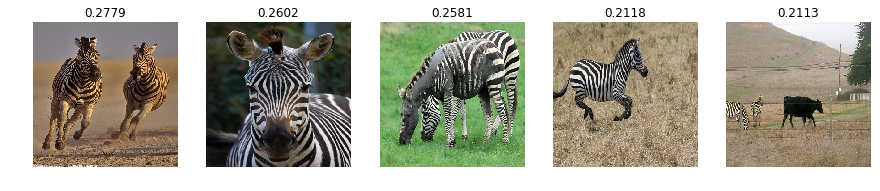

In [21]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 1

start = 1

for i in range(1, columns*rows + 1):
    img_path, cos = sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [22]:
#sorted_rank

In [29]:
# image list
my_class = 'horse_sub_1'
path = 'activations/images_used_' + my_class + '.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [30]:
#image_list

In [31]:
## loop through files

cav_1 = this_cav.cavs[0]
cav_1 = cav_1.reshape(-1,1)

new_rank = {}

#for img_path, cos_sim in sorted_rank:
for img_path in image_list:
    filename = img_path

    img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    img = np.float32(img) / 255.0
    
    acts_1 = mymodel.run_examples([img], 'mixed10')
    acts_shaped =  mymodel.reshape_activations(acts_1).squeeze()
    acts_shaped = acts_shaped.reshape(-1,1)
    cos = cosine_similarity(cav_1,acts_shaped)
    new_rank[img_path] = cos

NameError: name 'shape' is not defined

In [49]:
new_sorted_rank = sorted(new_rank.items(), key=operator.itemgetter(1),reverse=True)

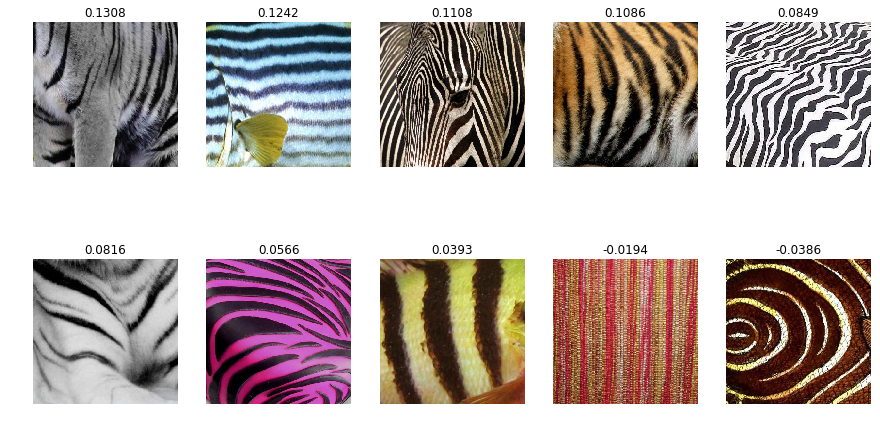

In [53]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 2

start = 41

for i in range(1, columns*rows +1):
    img_path, cos = new_sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
cav.get_or_train_cav()

In [55]:
## perturb

In [56]:
for img_path in image_list:
    filename = img_path

    img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
    img = np.float32(img) / 255.0
    
    acts_1 = mymodel.run_examples([img], 'mixed10')

In [67]:
acts_1[0][0][0]

array([0.        , 0.        , 0.        , ..., 0.29479256, 0.        ,
       0.        ], dtype=float32)

In [62]:
perturbed_act = this_cav.perturb_act(acts_1,'striped_sub_2')

In [66]:
perturbed_act[0][0][0]

array([ 0.08471466, -0.08600735,  0.0034667 , ...,  0.44867757,
        0.04259563, -0.02487374])

In [ ]:
mymodel.get_predictions()

In [ ]:
sess = K.get_session()

endpoints_v3 = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

mymodel = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], endpoints_v3, 
        'InceptionV3_public', (-1, 1))

In [41]:
#model.summary()

In [80]:
len(model.layers)

313

In [95]:
mixed_10 = model.layers[310]
mixed_10.get_input_at(0)

[<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
 <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>]

In [106]:
new_endpoints = dict(
    #input=model.inputs[0].name,
    input=mixed_10.name,
    input_tensor=mixed_10.input,
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)

tf.logging.set_verbosity(0)

working_dir = '/home/tyler/Desktop/tcav_on_azure'

label_path = os.path.join(working_dir,'labels.txt')

new_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], new_endpoints, 
        'InceptionV3_public', (-1, 1))

In [111]:
type(perturbed_act)

numpy.ndarray

In [116]:
new_model.ends

{'input': [<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
  <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
  <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
  <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>],
 'prediction': <tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>}

In [103]:
mixed_10.input

[<tf.Tensor 'activation_86/Relu:0' shape=(?, 8, 8, 320) dtype=float32>,
 <tf.Tensor 'mixed9_1/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'concatenate_2/concat:0' shape=(?, 8, 8, 768) dtype=float32>,
 <tf.Tensor 'activation_94/Relu:0' shape=(?, 8, 8, 192) dtype=float32>]

In [98]:
model.inputs[0]

<tf.Tensor 'input_1:0' shape=(?, 299, 299, 3) dtype=float32>

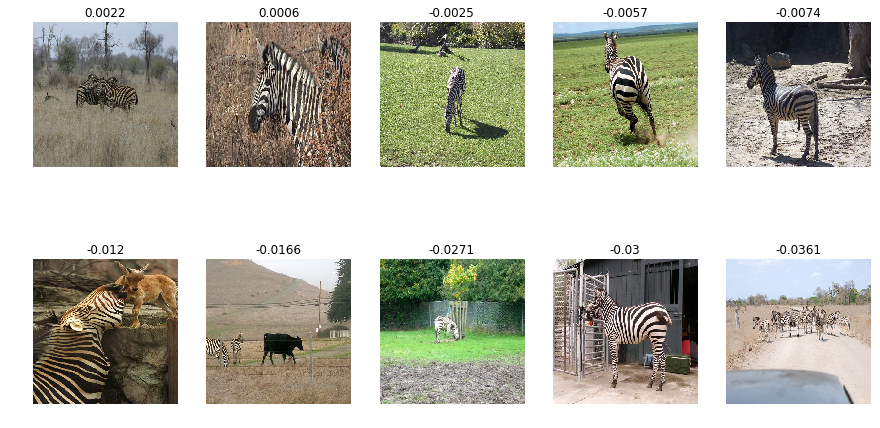

In [40]:
import matplotlib.pyplot as plt

w, h = 120, 120
fig = plt.figure(figsize=(15, 8))
columns, rows = 5, 2

start = 40

for i in range(1, columns*rows +1):
    img_path, cos = new_sorted_rank[start + i - 2]
    img = image.load_img(img_path, target_size=(299, 299))
    fig.add_subplot(rows, columns, i)
    plt.title(round(cos[0],4))
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [195]:
to_mixed_9 = model.layers[279]
to_mixed_9.output.name

'mixed9/concat:0'

In [199]:
## first_part

to_mixed_9 = model.layers[279]
to_mixed_9.get_input_at(0)

mixed_9 = model.layers[280]
mixed_9.get_input_at(0)

first_part_endpoints = dict(
    input=model.inputs[0].name,
    input_tensor=model.inputs[0],
    logit=to_mixed_9.output[0].name,
    prediction=to_mixed_9.output[0].name,
    prediction_tensor=to_mixed_9.output[0],
)

first_part_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], first_part_endpoints, 
        'InceptionV3_public', (-1, 1))

In [202]:
pred_1 = first_part_model.get_predictions(x)

In [201]:
## second_part
mixed_9 = model.layers[280]
mixed_9.get_input_at(0)

second_part_endpoints = dict(
    input=mixed_9.name,
    input_tensor=mixed_9.input,
    logit=model.outputs[0].name,
    prediction=model.outputs[0].name,
    prediction_tensor=model.outputs[0],
)


second_part_model = tcav_model.KerasModelWrapper(sess, 
        label_path, [299, 299, 3], second_part_endpoints, 
        'InceptionV3_public', (-1, 1))


In [239]:
# perturb
img = image.load_img(img_path, target_size=(299, 299))
img_array = np.array(img)
img_new_dims = np.expand_dims(img_array, axis=0)
img_input = preprocess_input(img_new_dims)

pred_1 = first_part_model.get_predictions(img_input)
pred_1 = np.expand_dims(pred_1, axis=0)

pred_1_pert = this_cav.perturb_act(pred_1,'striped_sub_1',alpha = 5)

pred_2 = second_part_model.get_predictions(pred_1_pert)
decode_predictions(pred_2, top=5)

[[('n02389026', 'sorrel', 0.5091535),
  ('n03538406', 'horse_cart', 0.092085764),
  ('n03967562', 'plow', 0.017240232),
  ('n03124170', 'cowboy_hat', 0.010698552),
  ('n04049303', 'rain_barrel', 0.010435037)]]

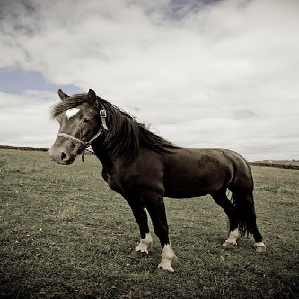

In [234]:
img

In [104]:
def files_from_dir(a_dir):
    onlyfiles = [f for f in os.listdir(a_dir) if os.path.isfile(os.path.join(a_dir, f))]
    return onlyfiles

In [227]:
this_dir = '/home/tyler/Desktop/tcav_on_azure/concepts/horse_sub_1'
imgs = files_from_dir(this_dir)

In [231]:
img_path = os.path.join(this_dir,imgs[2])

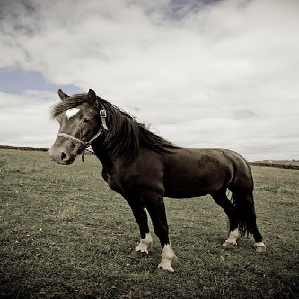

In [232]:
# Horse prediction
img = image.load_img(img_path, target_size=(299, 299))
img

In [131]:
from keras.applications.inception_v3 import preprocess_input

img_array = np.array(img)
x = np.expand_dims(img_array, axis=0)
x = preprocess_input(x)

pred = mymodel.get_predictions(x)
decode_predictions(pred, top=5)

[[('n01744401', 'rock_python', 0.41688702),
  ('n01740131', 'night_snake', 0.22719923),
  ('n01729322', 'hognose_snake', 0.14873463),
  ('n01751748', 'sea_snake', 0.06500338),
  ('n01737021', 'water_snake', 0.050590847)]]

In [132]:
## Perturb horse activations

In [136]:
filename = img_path

shape = (299,299)

img = np.array(PIL.Image.open(tf.gfile.Open(filename, 'rb')).convert('RGB').resize(shape, PIL.Image.BILINEAR))
img = np.float32(img) / 255.0

acts_1 = mymodel.run_examples([img], 'mixed9')

In [204]:
acts_1.shape

(1, 8, 8, 2048)

In [139]:
pred = new_model.get_predictions(acts_1)
decode_predictions(pred, top=5)

[[('n01751748', 'sea_snake', 0.58642876),
  ('n01740131', 'night_snake', 0.104258716),
  ('n01744401', 'rock_python', 0.08478935),
  ('n01737021', 'water_snake', 0.07812871),
  ('n01729322', 'hognose_snake', 0.020191545)]]

In [186]:
## Get CAV
working_dir = '/home/tyler/Desktop/tcav_on_azure'
subpath = 'striped_sub_1-random500_0-mixed9'
cav_path = 'cavs/' + subpath + '-linear-0.1.pkl'
path = os.path.join(working_dir, cav_path)

this_cav = cav.CAV.load_cav(path)

perturbed_act = this_cav.perturb_act(acts_1,'striped_sub_1',alpha = 20)

In [187]:
perturbed_act[0][0][0]

array([-0.47168261,  0.        , -0.33739523, ...,  0.        ,
        1.11533005,  0.        ])

In [188]:
#perturbed_act
pred = new_model.get_predictions(perturbed_act)

#pred = mymodel.get_predictions(x)
decode_predictions(pred, top=100)

[[('n02391049', 'zebra', 0.56864434),
  ('n01751748', 'sea_snake', 0.057790164),
  ('n01744401', 'rock_python', 0.02099161),
  ('n01737021', 'water_snake', 0.019440774),
  ('n02085620', 'Chihuahua', 0.016850617),
  ('n01924916', 'flatworm', 0.015738912),
  ('n03014705', 'chest', 0.01177068),
  ('n03291819', 'envelope', 0.007167278),
  ('n04033901', 'quill', 0.0057612723),
  ('n02110806', 'basenji', 0.00442999),
  ('n02107312', 'miniature_pinscher', 0.0044156807),
  ('n01729322', 'hognose_snake', 0.0042760544),
  ('n03447447', 'gondola', 0.00417383),
  ('n01740131', 'night_snake', 0.003706275),
  ('n02643566', 'lionfish', 0.0036837822),
  ('n03950228', 'pitcher', 0.0036402),
  ('n04229816', 'ski_mask', 0.0036118906),
  ('n02094114', 'Norfolk_terrier', 0.003574536),
  ('n02966193', 'carousel', 0.0029326987),
  ('n01735189', 'garter_snake', 0.0028454256),
  ('n02526121', 'eel', 0.0028007647),
  ('n03223299', 'doormat', 0.0025672787),
  ('n02808304', 'bath_towel', 0.002476462),
  ('n021303

In [64]:
acts['suit']['mixed10'][0].shape

(8, 8, 2048)

In [78]:
acts['suit']['mixed10'][0].shape

(8, 8, 2048)

In [99]:
a = acts['suit']['mixed10'][0]
a_flat = np.reshape(a, -1)
a_flat = a_flat.reshape(-1,1)

b = acts['suit']['mixed10'][1]
b_flat = np.reshape(b, -1)
b_flat = b_flat.reshape(-1,1)

In [ ]:
np.reshape(a, -1).reshape(-1,1)

In [100]:
b_flat.shape

(131072, 1)

In [128]:
cosine_similarity(a_flat,b_flat)

array([0.36934394], dtype=float32)

In [127]:
this_cav.cavs[0].shape

(131072,)

In [109]:
cav_1 = this_cav.cavs[0]
cav_1 = cav_1.reshape(-1,1)

In [110]:
cav_1.shape

(131072, 1)

In [117]:
cosine_similarity(acts_shaped,cav_1)

array([0.0373991])

In [45]:
## Using deriv

In [ ]:
mytcav = tcav.TCAV(sess,target, concepts, bottlenecks,
        act_generator, alphas,cav_dir = cav_dir,num_random_exp=1)

In [ ]:
this_cav.get_key()

In [ ]:
deriv = mytcav.get_directional_dir(
mymodel,
'zebra',
'striped_sub_1',
this_cav,
act_zebra
)

In [ ]:
len(deriv)

In [ ]:
this_d = {}

idx = 0
for d in deriv:
    this_d[idx] = d
    idx += 1

sorted_d = sorted(this_d.items(), key=operator.itemgetter(1),reverse=True)

In [ ]:
#source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'
path = 'files/f_used_10.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)
    
image_list = data

In [ ]:
#this_d

In [ ]:
len(sorted_d)

In [ ]:
rank = 23

img_path = image_list[sorted_d[rank][0]]
img = image.load_img(img_path, target_size=(299, 299))

In [ ]:
img

In [ ]:
#sorted_d

In [ ]:
xx = 2
top = images[sorted_d[0][0]]
bottom = images[sorted_d[xx][0]]
this_img = bottom
#this_img = top

In [ ]:
this_img

In [ ]:
img_path = source_images + this_img
img = image.load_img(img_path, target_size=(299, 299))

In [ ]:
img

## Load filenames

In [ ]:
#image_list

In [ ]:
len(image_list)

In [ ]:
#sorted_d

In [ ]:
xx = 3
bottom = image_list[sorted_d[xx][0]]
this_img = bottom

img_path = this_img
img = image.load_img(img_path, target_size=(299, 299))

img

In [ ]:
class_acts = acts
for i in range(len(class_acts)):
    print(i)
    act = np.expand_dims(class_acts[i], 0)

In [ ]:
working_dir = '/Users/tyler/Desktop/dissertation/programming/tcav'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = working_dir + '/concepts'

target = 'zebra'
concepts = ['striped'] 
concepts = ['dotted']   

bottlenecks = ['mixed8']


alphas = [0.1]

In [ ]:
activation_dir =  working_dir + '/activations/acts_zebra_mixed9'


with open(activation_dir, 'rb') as f:
    x = np.load(f)
    #data = pickle.load(f)

In [ ]:
x.shape

In [ ]:
#acts

In [ ]:
def cos_sim(a,b):
    return np.dot(a, b)/(norm(a)*norm(b))